Estudio del *dataset* de noticias falsas:

In [2]:
# DATOS: https://sites.google.com/view/huhuatiberlef23/huhu ***HAY QUE CITARLO APROPIADAMENTE*** #

### IMPORTS ###
import pandas as pd
import numpy as np
import pathlib as pl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from textaugment import EDA

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [3]:
from google.colab import drive
drive.mount('/content/drive')

PATH = "/content/drive/My Drive/PLN/Práctica Final PLN/Data/"

Mounted at /content/drive


In [5]:
### PARTICIÓN ###
df = pd.read_csv(PATH + "train.csv",  sep=',', on_bad_lines='skip', encoding='utf-8', encoding_errors='ignore', index_col=False)
df = df[['tweet', 'humor']]
df = df.rename(columns={"tweet": "Text", "humor": "Label"})
df.fillna(" ", inplace=True)

X_train = df['Text']
y_train = df['Label']

X_train, X_aux, y_train, y_aux = train_test_split(X_train, y_train, test_size=0.3, random_state=55, stratify=y_train)
X_val, X_test, y_val, y_test = train_test_split(X_aux, y_aux, test_size=0.66, random_state=55, stratify=y_aux)

X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

print('Tamaño conjunto de Entrenamiento:', len(X_train))
print('Tamaño conjunto de Validación:', len(X_val))
print('Tamaño conjunto de Evaluación:', len(X_test))

Tamaño conjunto de Entrenamiento: 1869
Tamaño conjunto de Validación: 272
Tamaño conjunto de Evaluación: 530


# **DATA AUGMENTATION**

In [ ]:
t = EDA()

i = 0
for i in range(1869):
    new_text = t.synonym_replacement(X_train[i])
    X_train = X_train.append(pd.Series([new_text]), ignore_index=True)
    y_train = y_train.append(pd.Series([y_train[i]]), ignore_index=True)
    
    new_text = t.random_swap(X_train[i])
    X_train = X_train.append(pd.Series([new_text]), ignore_index=True)
    y_train = y_train.append(pd.Series([y_train[i]]), ignore_index=True)
    
    new_text = t.random_deletion(X_train[i])
    X_train = X_train.append(pd.Series([new_text]), ignore_index=True)
    y_train = y_train.append(pd.Series([y_train[i]]), ignore_index=True)
    
    i = i + 1
    
print('Tamaño conjunto de Entrenamiento:', len(X_train))
print('Tamaño conjunto de Validación:', len(X_val))
print('Tamaño conjunto de Evaluación:', len(X_test)) 


C:\Users\aleja\AppData\Local\Temp\ipykernel_23580\4147301159.py:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(pd.Series([new_text]), ignore_index=True)
C:\Users\aleja\AppData\Local\Temp\ipykernel_23580\4147301159.py:7: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train = y_train.append(pd.Series([y_train[i]]), ignore_index=True)
C:\Users\aleja\AppData\Local\Temp\ipykernel_23580\4147301159.py:10: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train = X_train.append(pd.Series([new_text]), ignore_index=True)
C:\Users\aleja\AppData\Local\Temp\ipykernel_23580\4147301159.py:11: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.c

Tamaño conjunto de Entrenamiento: 7476
Tamaño conjunto de Validación: 272
Tamaño conjunto de Evaluación: 530


# **ESTUDIO TRAINING**

0    5044
1    2432
dtype: int64


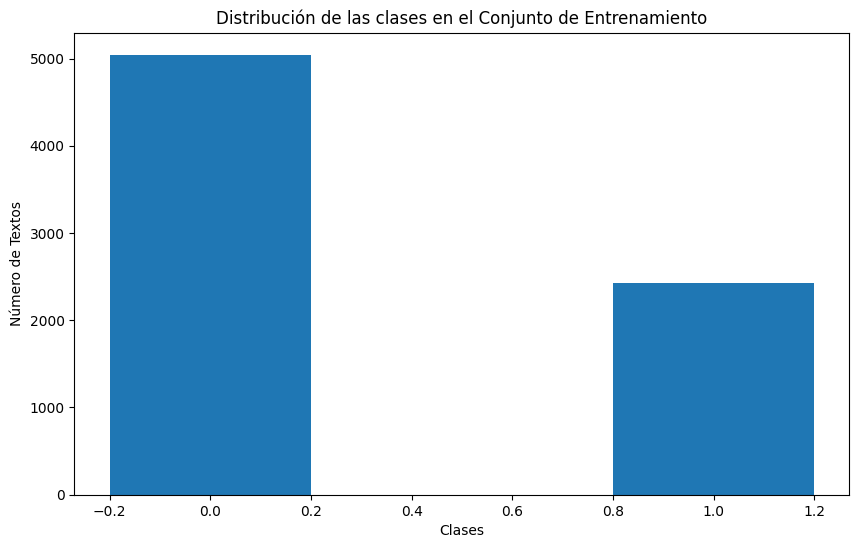

In [ ]:
# Análisis de Distribución #
counts = y_train.value_counts()
print(counts)

counts_train = y_train.value_counts().to_dict()

fig = plt.figure(figsize = (10, 6))
LABELS = counts_train.keys()
values = counts_train.values()

plt.bar(LABELS, values, width = 0.4)
plt.xlabel("Clases")
plt.ylabel("Número de Textos")
plt.title("Distribución de las clases en el Conjunto de Entrenamiento")
plt.show()

In [ ]:
# Análisis de Longitud #
Train_len = X_train.apply(lambda text: len(str(text).split()))
Train_len.describe()

count    7476.000000
mean       22.963216
std        12.692994
min         1.000000
25%        13.000000
50%        20.000000
75%        30.000000
max        62.000000
dtype: float64

Text(0, 0.5, 'Número de textos')

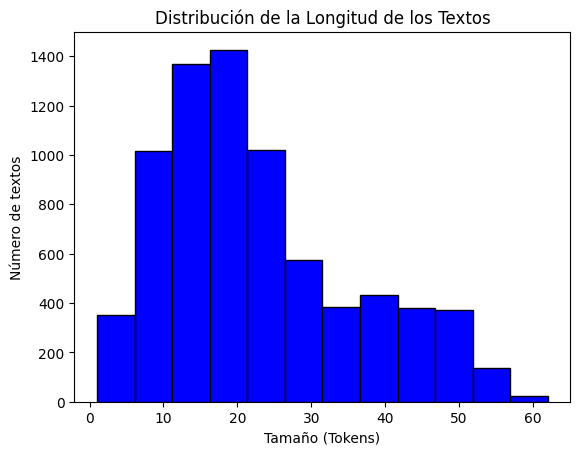

In [ ]:
plt.hist(Train_len, color = 'blue', edgecolor = 'black', bins = int(60/5))
plt.title('Distribución de la Longitud de los Textos')
plt.xlabel('Tamaño (Tokens)')
plt.ylabel('Número de textos')

Text(0, 0.5, 'Densidad')

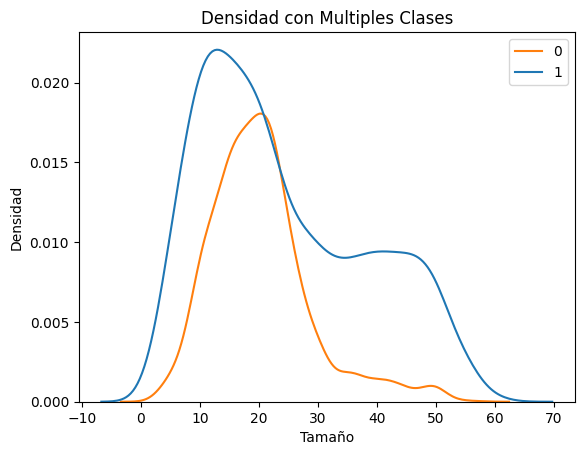

In [ ]:
# Densidad de Clases #
Densidad = pd.DataFrame({'Length': Train_len, 'Label': y_train})
sns.kdeplot(data=Densidad, x='Length', hue='Label')

plt.legend(LABELS)
plt.title('Densidad con Multiples Clases')
plt.xlabel('Tamaño')
plt.ylabel('Densidad')

# **ESTUDIO VALIDACIÓN**

0    183
1     89
Name: Label, dtype: int64


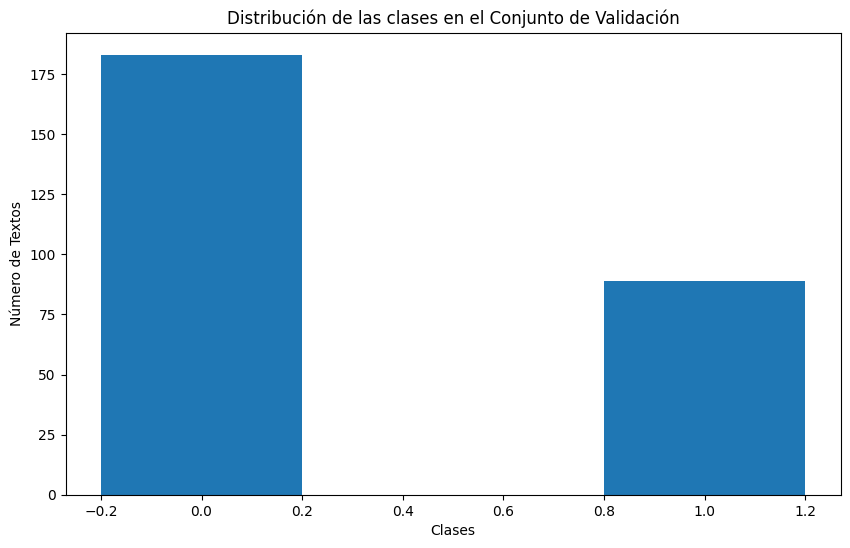

In [ ]:
# Análisis de Distribución #
counts = y_val.value_counts()
print(counts)

counts_val = y_val.value_counts().to_dict()

fig = plt.figure(figsize = (10, 6))
LABELS = counts_val.keys()
values = counts_val.values()

plt.bar(LABELS, values, width = 0.4)
plt.xlabel("Clases")
plt.ylabel("Número de Textos")
plt.title("Distribución de las clases en el Conjunto de Validación")
plt.show()

In [ ]:
# Análisis de Longitud #
Val_len = X_val.apply(lambda text: len(str(text).split()))
Val_len.describe()

count    272.000000
mean      22.492647
std       11.780900
min        4.000000
25%       14.000000
50%       20.000000
75%       29.000000
max       56.000000
Name: Text, dtype: float64

Text(0, 0.5, 'Número de textos')

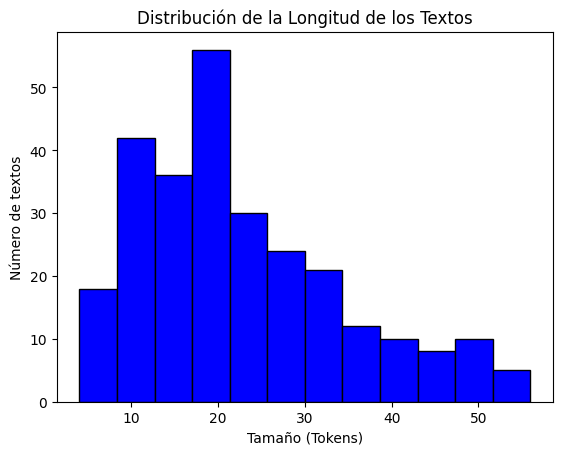

In [ ]:
plt.hist(Val_len, color = 'blue', edgecolor = 'black', bins = int(60/5))
plt.title('Distribución de la Longitud de los Textos')
plt.xlabel('Tamaño (Tokens)')
plt.ylabel('Número de textos')

Text(0, 0.5, 'Densidad')

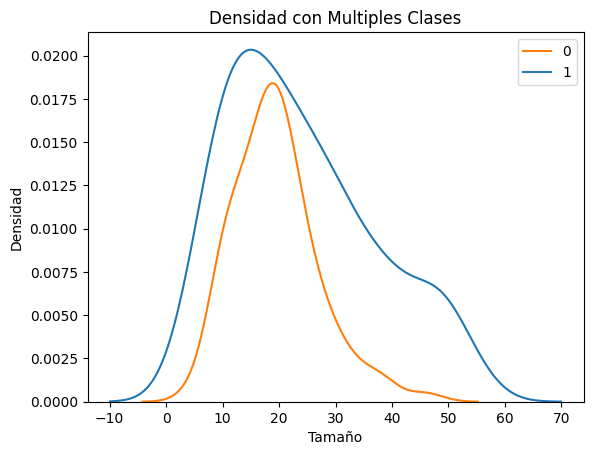

In [ ]:
# Densidad de Clases #
Densidad2 = pd.DataFrame({'Length': Val_len, 'Label': y_val})
sns.kdeplot(data=Densidad2, x='Length', hue='Label')

plt.legend(LABELS)
plt.title('Densidad con Multiples Clases')
plt.xlabel('Tamaño')
plt.ylabel('Densidad')

# **ESTUDIO TEST**

0    358
1    172
Name: Label, dtype: int64


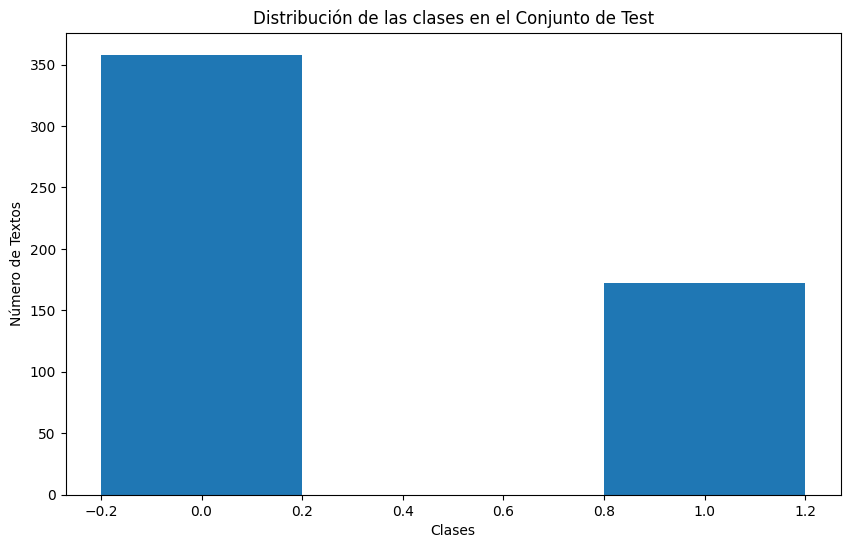

In [ ]:
# Análisis de Distribución #
counts = y_test.value_counts()
print(counts)

counts_test = y_test.value_counts().to_dict()

fig = plt.figure(figsize = (10, 6))
LABELS = counts_test.keys()
values = counts_test.values()

plt.bar(LABELS, values, width = 0.4)
plt.xlabel("Clases")
plt.ylabel("Número de Textos")
plt.title("Distribución de las clases en el Conjunto de Test")
plt.show()

In [ ]:
# Análisis de Longitud #
Test_len = X_test.apply(lambda text: len(str(text).split()))
Test_len.describe()

count    530.000000
mean      22.666038
std       12.858977
min        3.000000
25%       13.000000
50%       20.000000
75%       30.000000
max       57.000000
Name: Text, dtype: float64

Text(0, 0.5, 'Número de textos')

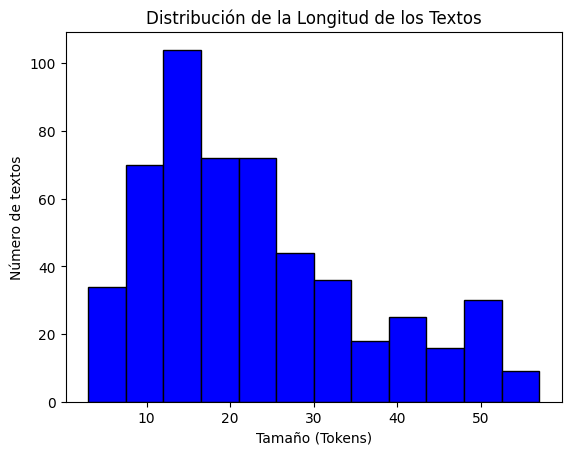

In [ ]:
plt.hist(Test_len, color = 'blue', edgecolor = 'black', bins = int(60/5))
plt.title('Distribución de la Longitud de los Textos')
plt.xlabel('Tamaño (Tokens)')
plt.ylabel('Número de textos')

Text(0, 0.5, 'Densidad')

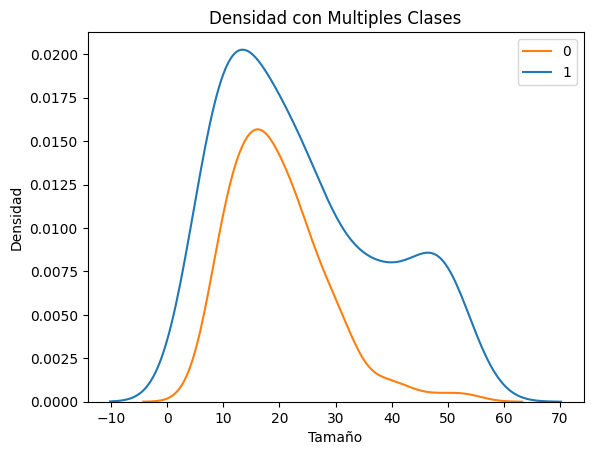

In [ ]:
# Densidad de Clases #
Densidad3 = pd.DataFrame({'Length': Test_len, 'Label': y_test})
sns.kdeplot(data=Densidad3, x='Length', hue='Label')

plt.legend(LABELS)
plt.title('Densidad con Multiples Clases')
plt.xlabel('Tamaño')
plt.ylabel('Densidad')